In [241]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
# Load the data
unemployment_data = pd.read_excel("C:/Users/acs/OneDrive/Desktop/Unemployment project/unemployment_data.xlsx")


In [243]:
# Display the first few rows of the DataFrame
print(unemployment_data.head())

           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-05-2019   Monthly                             3.65   
1  Andhra Pradesh  30-06-2019   Monthly                             3.05   
2  Andhra Pradesh  31-07-2019   Monthly                             3.75   
3  Andhra Pradesh  31-08-2019   Monthly                             3.32   
4  Andhra Pradesh  30-09-2019   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


In [244]:
# Data Cleaning and Preprocessing
# Check for missing values
print(unemployment_data.isnull().sum())


Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64


In [245]:
# Handling missing values
# Drop rows with missing values
unemployment_data.dropna(inplace=True)

# Check if missing values are removed
print(unemployment_data.isnull().sum())

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


In [246]:
# Check data types
print(unemployment_data.dtypes)


Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object


In [247]:
# Convert Date column to datetime with dayfirst=True
unemployment_data['Date'] = pd.to_datetime(unemployment_data['Date'], dayfirst=True)



In [248]:
# EDA
# Summary statistics
print(unemployment_data.describe())

                                Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                                38.062500

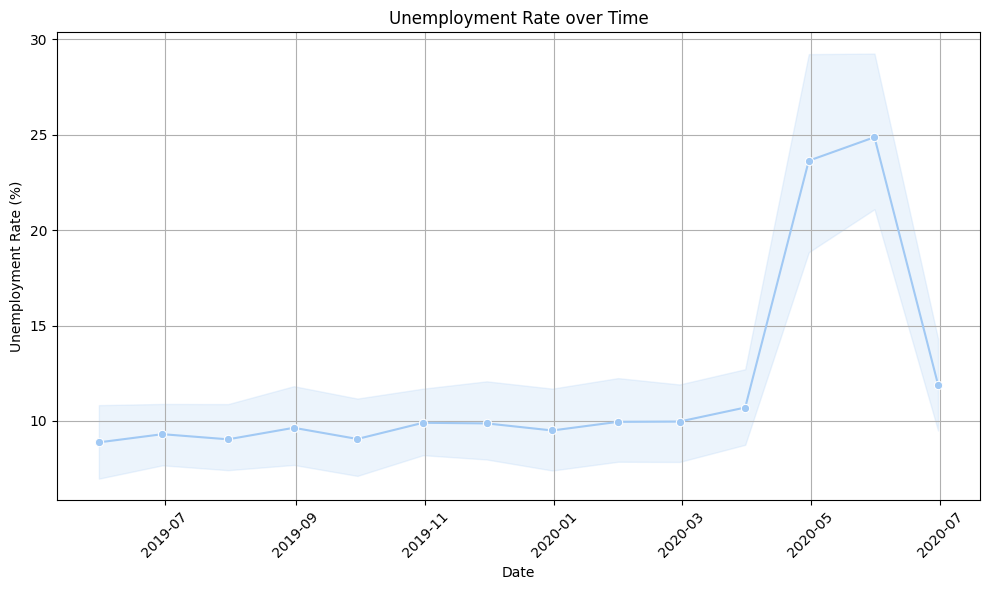

In [249]:
# Visualizations
# 1. Line plot of Unemployment Rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=unemployment_data, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title('Unemployment Rate over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

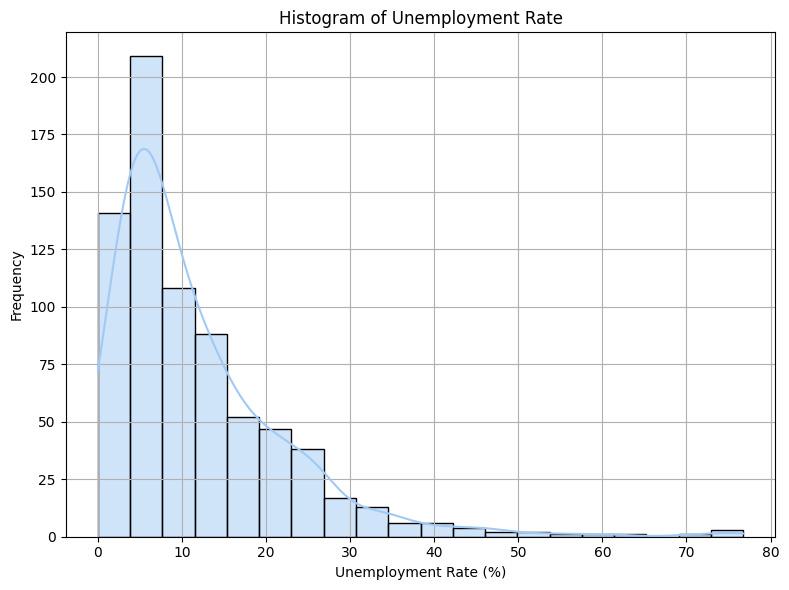

In [250]:
# 2. Histogram of Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(data=unemployment_data, x='Estimated Unemployment Rate (%)', bins=20, kde=True)
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

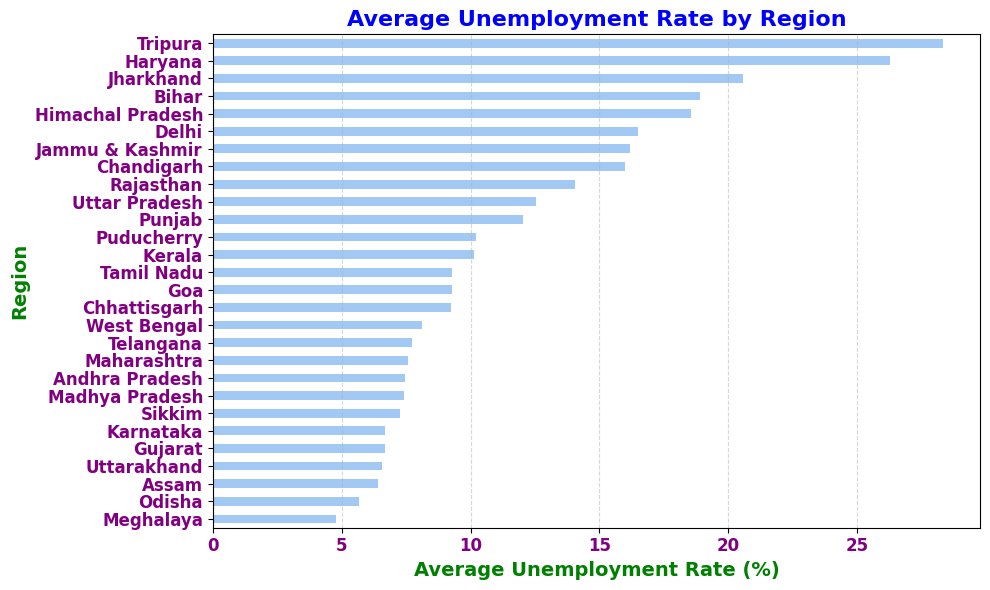

In [251]:
# 3. Bar plot of Average Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")  # Set color palette
average_unemployment_by_region = unemployment_data.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()
average_unemployment_by_region.plot(kind='barh')
plt.title('Average Unemployment Rate by Region', fontsize=16, fontweight='bold', color='blue')  # Title styling
plt.xlabel('Average Unemployment Rate (%)', fontsize=14, fontweight='bold', color='green')  # X-axis label styling
plt.ylabel('Region', fontsize=14, fontweight='bold', color='green')  # Y-axis label styling
plt.xticks(fontsize=12, fontweight='bold', color='purple')  # X-axis ticks styling
plt.yticks(fontsize=12, fontweight='bold', color='purple')  # Y-axis ticks styling
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Grid styling with reduced opacity
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



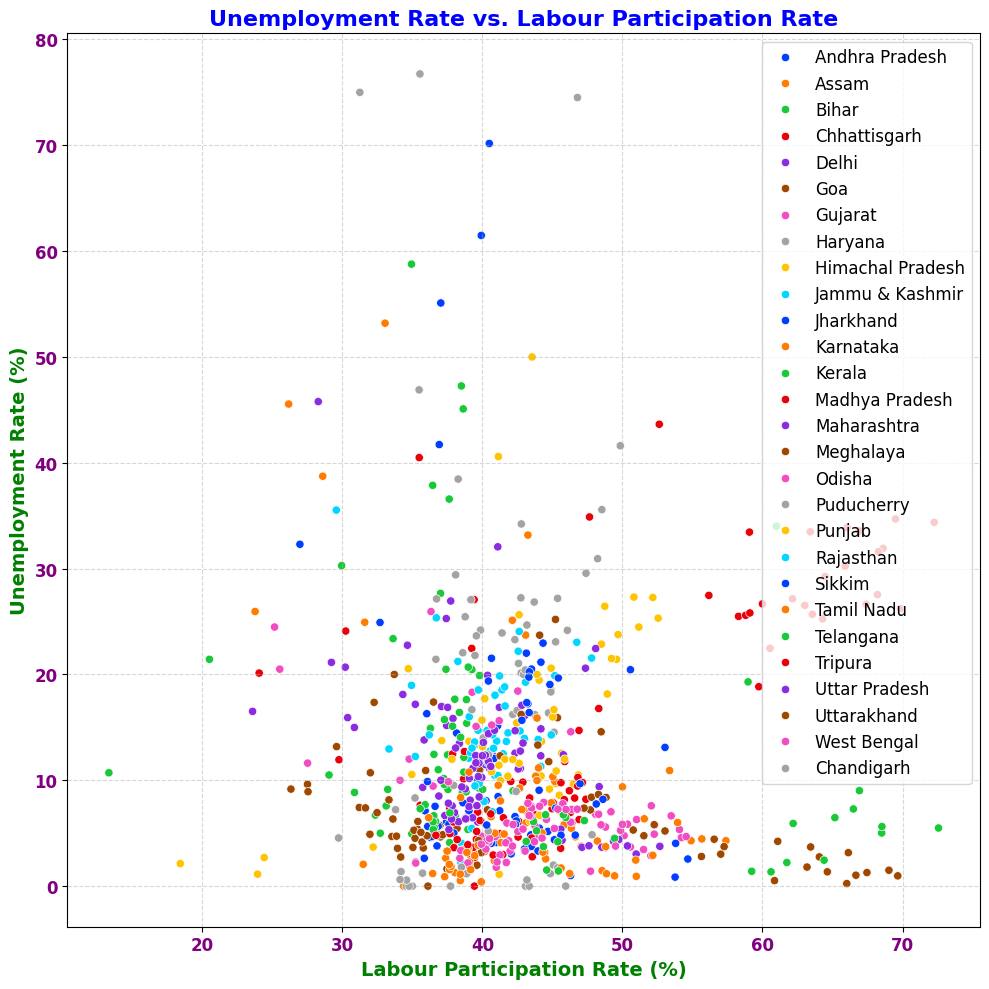

In [252]:
# 4. Scatter plot of Unemployment Rate vs. Labour Participation Rate with color mapping to Region
plt.figure(figsize=(10, 10))
sns.scatterplot(data=unemployment_data, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region', palette='bright')
plt.title('Unemployment Rate vs. Labour Participation Rate', fontsize=16, fontweight='bold', color='blue')  # Title styling
plt.xlabel('Labour Participation Rate (%)', fontsize=14, fontweight='bold', color='green')  # X-axis label styling
plt.ylabel('Unemployment Rate (%)', fontsize=14, fontweight='bold', color='green')  # Y-axis label styling
plt.xticks(fontsize=12, fontweight='bold', color='purple')  # X-axis ticks styling
plt.yticks(fontsize=12, fontweight='bold', color='purple')  # Y-axis ticks styling
plt.grid(True, linestyle='--', alpha=0.5)  # Grid styling with reduced opacity
plt.legend(loc='upper right', fontsize=12)  # Add legend with fontsize
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



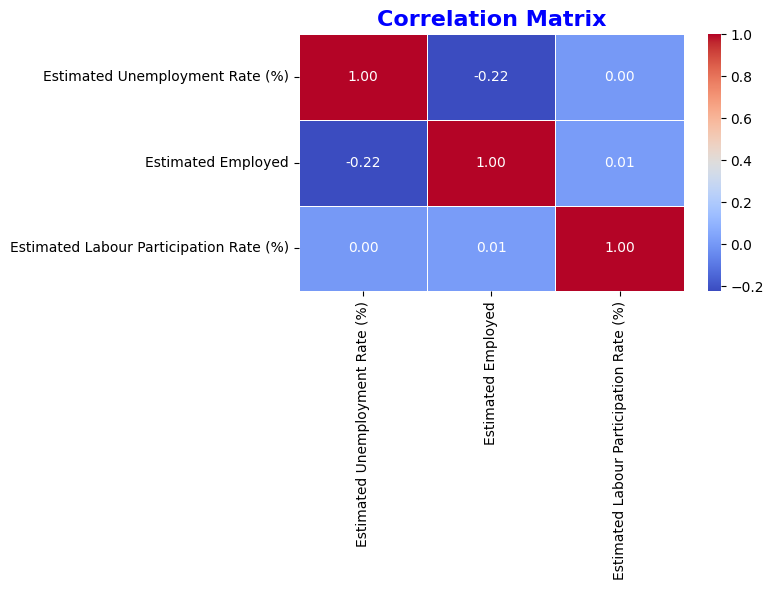

In [254]:

# 5. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_columns = unemployment_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_columns.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', color='blue')  # Title styling
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


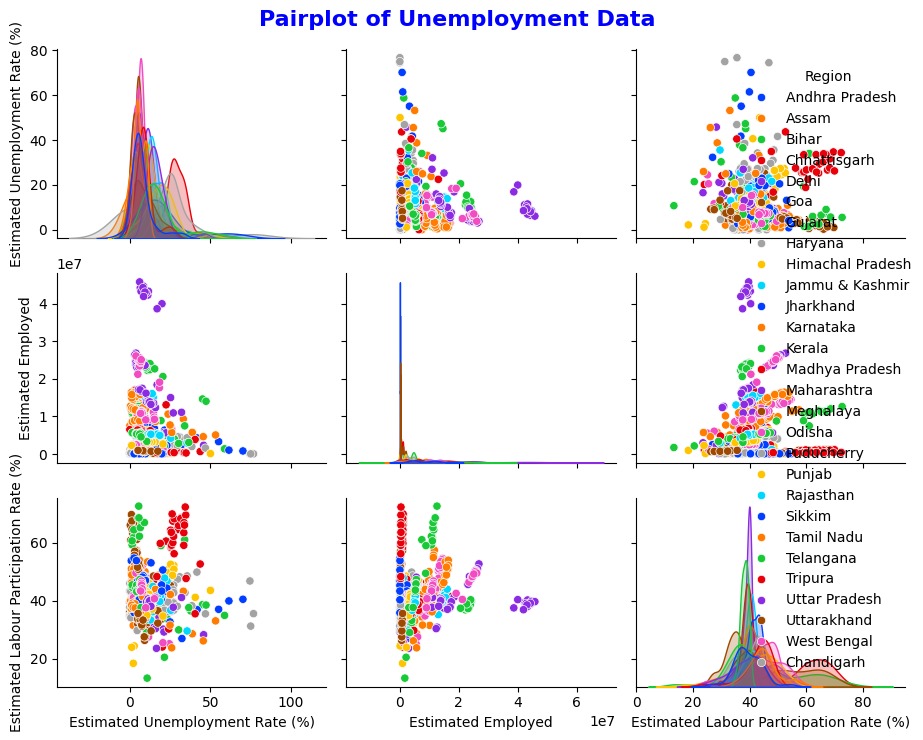

In [256]:
# 6. Pairplot to visualize relationships between multiple variables
sns.pairplot(unemployment_data, hue='Region', palette='bright')
plt.suptitle('Pairplot of Unemployment Data', fontsize=16, fontweight='bold', color='blue')  # Title styling
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()